# A lower barrier

In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import palettable as pl
emr = pl.cartocolors.sequential.Emrld_7.get_mpl_colormap()

from quantum_mechanics import WaveFunction
from utils import box_potential

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
N = 1000 # spatial discretization
Nt = 2000 # temporal discretization
n = np.arange(N) # for n-related stuff
x = np.linspace(0,1, N) # the spatial axis
t = np.linspace(0, 1500, Nt) # temporal axis
dt = t[1]-t[0]
potential_strength = 100

In [200]:
vr_list = np.linspace(-100, 100, 1000)

In [36]:
%%time
e0 = []
e1 =[]
for vr in vr_list:
    V = box_potential(N, potential_strength, vr)
    wave =WaveFunction(N, V)
    wave.construct_hamiltonian()
    wave.solve_eigenvalues()
    e0.append(wave.e[0])
    e1.append(wave.e[1])

Wall time: 37.4 s


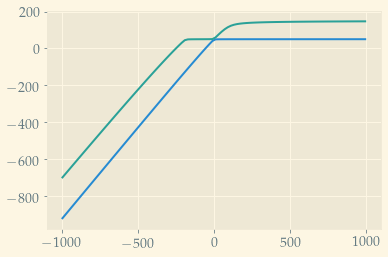

In [37]:
plt.plot(vr_list, e0)
plt.plot(vr_list, e1)

In [100]:
vv = box_potential(N, potential_strength, 0)
%time wf = WaveFunction(N, vv)
%time wf.construct_hamiltonian()
%time wf.solve_eigenvalues()

Wall time: 1.99 ms
Wall time: 927 µs
Wall time: 388 ms


In [104]:
wf.e[1] - wf.e[0]

5.696213582014231

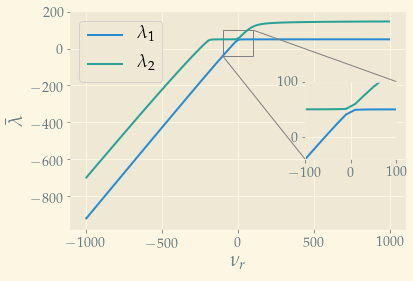

In [99]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(vr_list, e0, label = fr"$\lambda_1$")
ax.plot(vr_list, e1, label = fr"$\lambda_2$")
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
axins = zoomed_inset_axes(ax, 3, loc="right")
x1, x2, y1, y2 = -100, 100, -40, 100 # specify the limits
axins.set_xlim(x1, x2) # apply the x-limits
axins.set_ylim(y1, y2)
axins.plot(vr_list, e0)
axins.plot(vr_list, e1)
axins.xaxis.set_visible('False')
axins.yaxis.set_visible('False')

from mpl_toolkits.axes_grid1.inset_locator import mark_inset
mark_inset(ax, axins, loc1=3, loc2=1, fc="none", ec="0.5")

ax.set_xlabel(fr"$\nu_r$", size=20)
ax.set_ylabel(fr"$\bar\lambda$", size=20)
ax.legend()


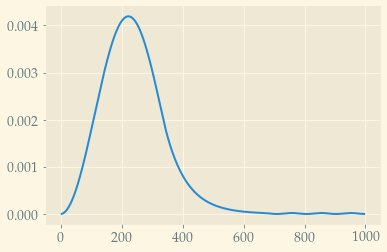

In [49]:
plt.plot(np.abs(wf.v[:,3])**2)

## Two level system
---

In [210]:
from utils import ev_H

In [211]:
def get_H(ep, tau):
    return np.array([[-ep/2, tau], [tau, ep/2]])

In [239]:
h = get_H(ep, 100)
h

array([[ -2.84810679, 100.        ],
       [100.        ,   2.84810679]])

In [219]:
from numpy.linalg.linalg import eigh

In [232]:
e, v = eigh(h)

Wall time: 0 ns
Wall time: 0 ns
Wall time: 449 ms


5.696213582014231

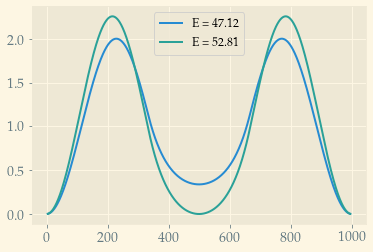

In [201]:
N = 1000
vv = box_potential(N, potential_strength, 0)
%time wf = WaveFunction(N, vv)
%time wf.construct_hamiltonian()
%time wf.solve_eigenvalues()

v1 = np.sqrt(wf.N)*wf.v[:,0]
v2 = np.sqrt(wf.N)*wf.v[:,1]
plt.plot(np.abs(v1)**2, label = f"E = {wf.e[0]:.2f}")
plt.plot(np.abs(v2)**2,  label = f"E = {wf.e[1]:.2f}")
plt.legend(fontsize=12)
ep = wf.e[1]-wf.e[0]
ep

In [132]:
from utils import inner_product

In [202]:
%%time 
H = wf.H.toarray()
tau = []
for v in vr_list:
    op=ev_H(H, v)
    ev = inner_product(op@v2, v1)
    tau.append(ev)

Wall time: 25.3 s


C:\Users\KarlKristian\Anaconda3\envs\numfys\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


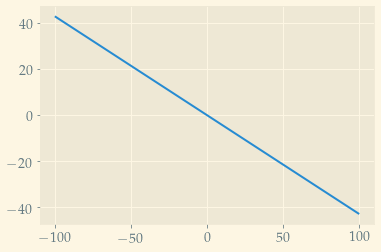

In [203]:
plt.plot(vr_list, tau)

# Interaction picture
---

In [253]:
from utils import two_level_hamiltonian

In [256]:
h =two_level_hamiltonian(ep, 0)

In [257]:
e, (g0,e0) = eigh(h)

In [259]:
hbar=1.05e-34